In [8]:
# importamos librerías

import numpy as np
import pandas as pd

# modelo
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

# gráficas

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(20,20)

In [2]:
# cargamos los datos

train_dir = '/Users/caromsa/Documents/DataScience/X_rays/train'
val_dir = '/Users/caromsa/Documents/DataScience/X_rays/val'
test_dir = '/Users/caromsa/Documents/DataScience/X_rays/test'

In [40]:
# configuración de los generadores de imágenes

batch_size = 32
img_size = 224

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary')

val_data = val_datagen.flow_from_directory(
        val_dir,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary')

test_data = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Observación de imagenes

Radiografía de persona con Neumonía

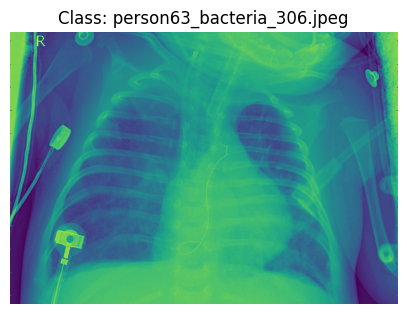

In [31]:
from glob import glob 
import os

pneu = glob(train_dir+"/PNEUMONIA/*.jpeg")

for img_pneu in pneu:
    img_pneu = pneu[0]
    img = plt.imread(img_pneu)
    plt.figure(figsize = (5 , 5))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Class: {os.path.basename(img_pneu)}')
    plt.show()
    break

Radiografía de persona normal

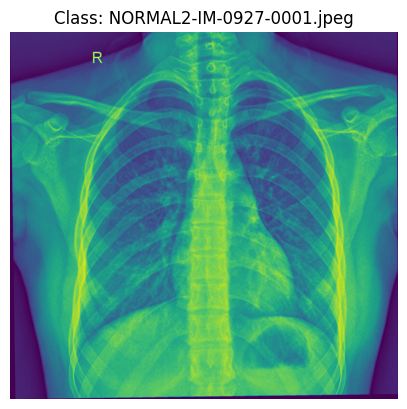

In [32]:
norm = glob(train_dir+"/NORMAL/*.jpeg")

for img_norm in norm:
    img_norm = norm[0]
    img = plt.imread(img_norm)
    plt.figure(figsize = (5 , 5))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Class: {os.path.basename(img_norm)}')
    plt.show()
    break

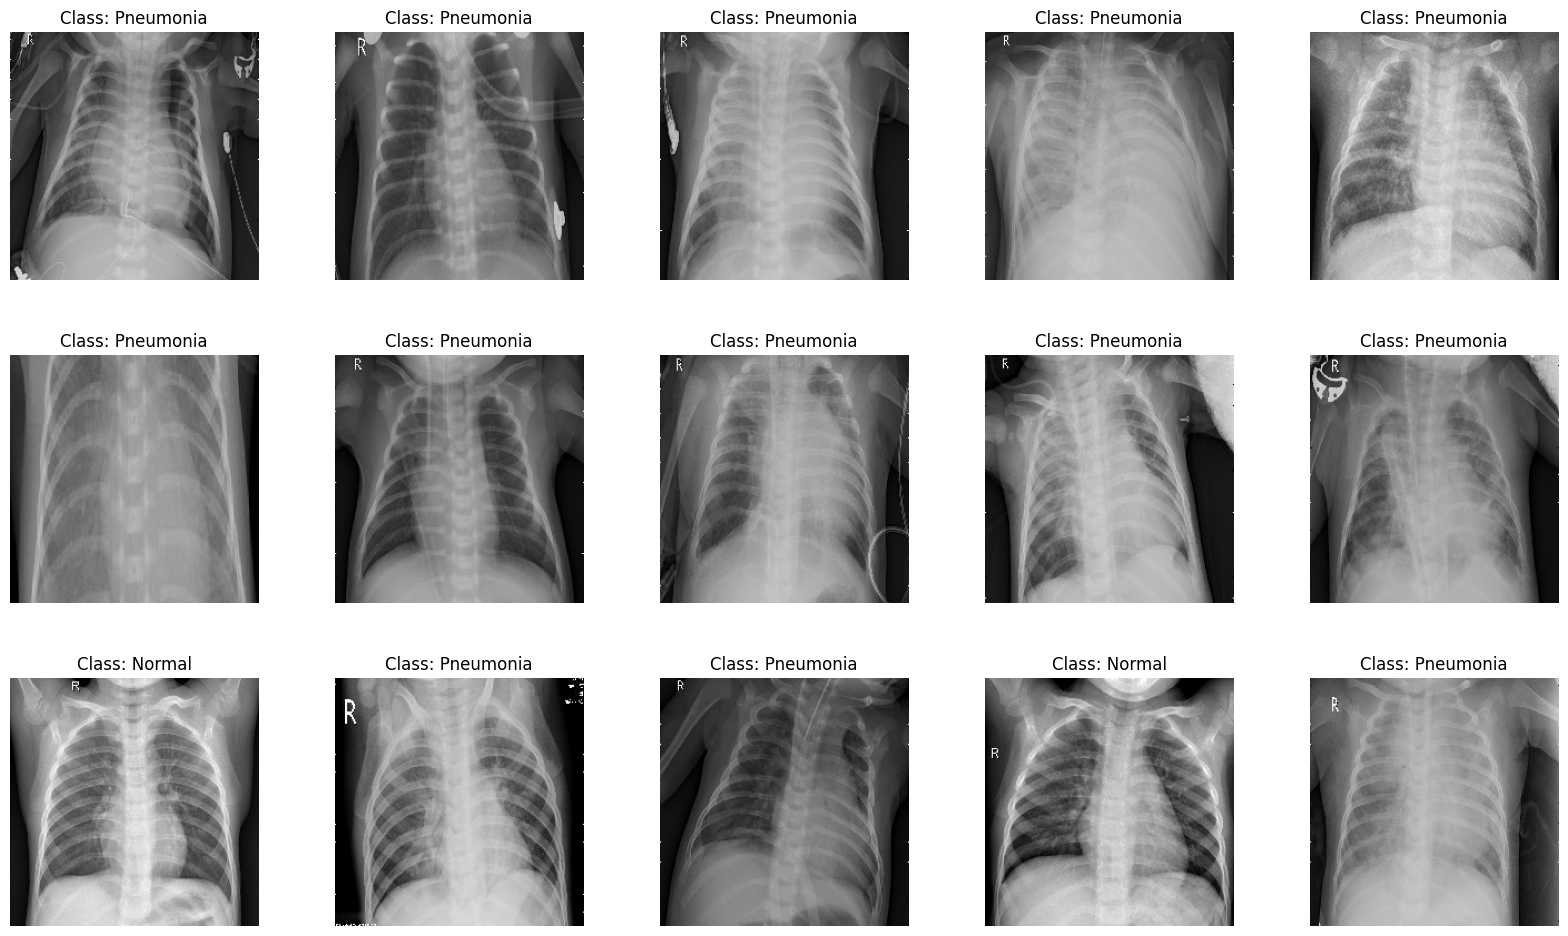

In [63]:
# graficamos las imagenes en vista general
labels=['Normal','Pneumonia']
samples=train_data.__next__()

images=samples[0]
target=samples[1]

for i in range(15):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.3,wspace=.3)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[int(target[i])]}")
    plt.axis('off')

Metadata

In [34]:
data = pd.DataFrame(train_data.classes)
data.value_counts()

1    3875
0    1341
dtype: int64

In [35]:
data_val =pd.DataFrame(val_data.classes)
data_val.value_counts()

0    8
1    8
dtype: int64

In [36]:
data_test =pd.DataFrame(test_data.classes)
data_test.value_counts()

1    390
0    234
dtype: int64

Contrucción de la CNN

In [37]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_size, img_size ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

2023-04-01 01:53:52.704559: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 56, 56, 32)        0

In [42]:
# compilación del modelo

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

epochs = 10
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs,
    batch_size=batch_size
)

Epoch 1/10
163/163 [==============================] - 87s 521ms/step - loss: 0.5087 - accuracy: 0.8499 - val_loss: 0.3714 - val_accuracy: 0.6875
Epoch 2/10
163/163 [==============================] - 86s 529ms/step - loss: 0.1203 - accuracy: 0.9540 - val_loss: 0.4673 - val_accuracy: 0.6875
Epoch 3/10
163/163 [==============================] - 87s 532ms/step - loss: 0.0871 - accuracy: 0.9643 - val_loss: 0.4813 - val_accuracy: 0.6875
Epoch 4/10
163/163 [==============================] - 87s 533ms/step - loss: 0.0723 - accuracy: 0.9737 - val_loss: 0.3229 - val_accuracy: 0.8125
Epoch 5/10
163/163 [==============================] - 87s 530ms/step - loss: 0.0594 - accuracy: 0.9774 - val_loss: 0.1548 - val_accuracy: 0.9375
Epoch 6/10
163/163 [==============================] - 86s 526ms/step - loss: 0.0612 - accuracy: 0.9743 - val_loss: 0.2100 - val_accuracy: 0.8750
Epoch 7/10
163/163 [==============================] - 88s 536ms/step - loss: 0.0479 - accuracy: 0.9824 - val_loss: 0.0192 - val_ac

Evaluación del modelo

In [43]:
test_loss, test_acc = model.evaluate(test_data, verbose=2)
print('Test accuracy: ',test_acc)
print('Test loss: ',test_loss)

predictions = model.predict(test_data)

20/20 - 6s - loss: 1.6888 - accuracy: 0.7388 - 6s/epoch - 318ms/step
Test accuracy:  0.7387820482254028
Test loss:  1.6888114213943481
20/20 [==============================] - 6s 304ms/step


Métricas de eficacia del modelo

In [62]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

test_labels = test_data.classes
test_pred = (predictions > 0.5).astype(int)
accuracy = accuracy_score(test_labels, test_pred)

print(confusion_matrix(test_labels,test_pred))
print(classification_report(test_labels,test_pred, target_names=labels))
print('Accuracy:', accuracy)

[[ 37 197]
 [ 40 350]]
              precision    recall  f1-score   support

      Normal       0.48      0.16      0.24       234
   Pnuemonia       0.64      0.90      0.75       390

    accuracy                           0.62       624
   macro avg       0.56      0.53      0.49       624
weighted avg       0.58      0.62      0.56       624

Accuracy: 0.6201923076923077


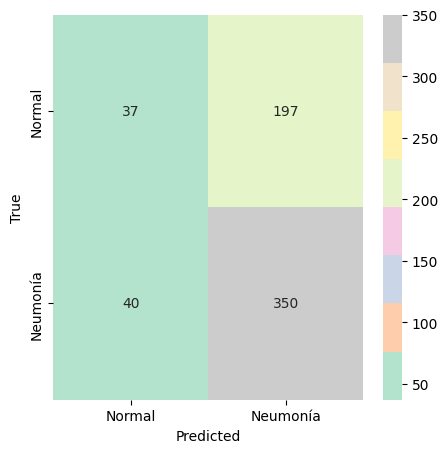

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Crear la matriz de confusión
cm = confusion_matrix(test_labels, test_pred)

# Configurar el tamaño de la figura
plt.figure(figsize=(5,5))

# Configurar el mapa de calor con Seaborn
sns.heatmap(cm, cmap='Pastel2', annot=True, fmt='g',            
            xticklabels=['Normal', 'Neumonía'], 
            yticklabels=['Normal', 'Neumonía'])

# Configurar las etiquetas de los ejes
plt.xlabel('Predicted')
plt.ylabel('True')

# Mostrar la figura
plt.show()


In [59]:
model.save('ModelX.h5')